# Machine Learning Project on Titanic Dataset

### Import Libraries

In [15]:
import numpy as np
import pandas as pd
import pickle
import json
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Define Problem Statement

In [ ]:
To check whether paitient having Diabetes or Not

In [ ]:
Data Gathering

In [2]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
df.drop(["Name","Ticket"],axis=1,inplace=True)

# EDA

## A. Understand Our Data

In [56]:
### How big is our data is

In [57]:
df.shape

(891, 10)

In [58]:
### Get Overview of data

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Gender       891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Cabin        204 non-null    object 
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [60]:
### Check for missing values

In [61]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Gender           0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
### Check for Duplicate data

In [63]:
df.duplicated().sum()

0

In [64]:
### How data looks mathematically

In [65]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.386083,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.487123,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
### Check for co-relation between features

In [67]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.012727,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.012727,1.000000,-0.334297,-0.084477,-0.029105,0.082218,0.255762
Pclass,-0.035144,-0.334297,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.084477,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.029105,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.082218,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.255762,-0.549500,0.096067,0.159651,0.216225,1.000000


## B. Visualization of Data

### 1. Univariate Analysis

In [68]:
### Categorical data

<AxesSubplot:xlabel='Survived', ylabel='count'>

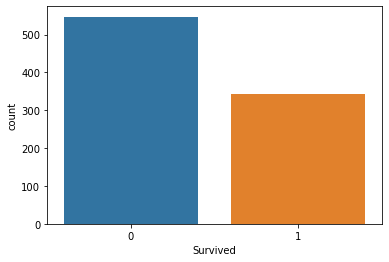

In [69]:
sns.countplot(df["Survived"])

<AxesSubplot:ylabel='Survived'>

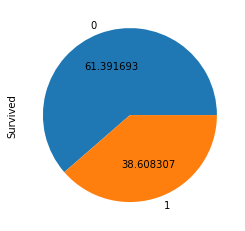

In [70]:
df["Survived"].value_counts().plot(kind="pie",autopct="%-2f")

In [71]:
### Numerical Data

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

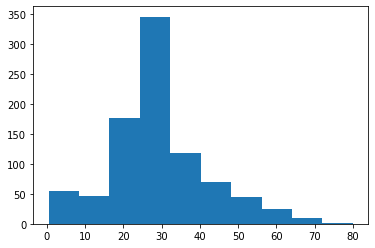

In [90]:
plt.hist(df["Age"])   #distribution of Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

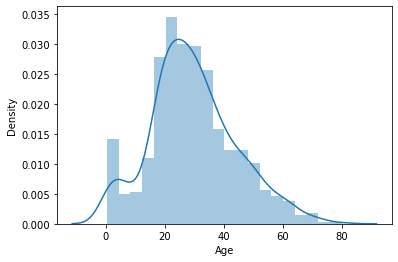

In [73]:
sns.distplot(df["Age"])

<AxesSubplot:ylabel='Density'>

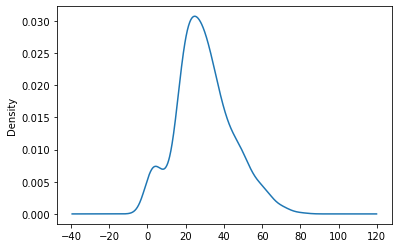

In [74]:
df["Age"].plot(kind="kde")

<AxesSubplot:xlabel='Age'>

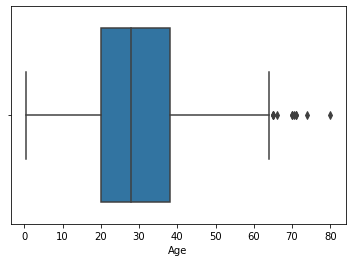

In [75]:
sns.boxplot(df["Age"])

In [76]:
df["Age"].skew()  # check skewness

0.38910778230082704

### 2. Bivariate/Multivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Survived'>

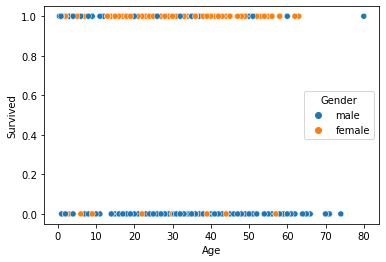

In [77]:
sns.scatterplot(df["Age"],df["Survived"],hue=df["Gender"])

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

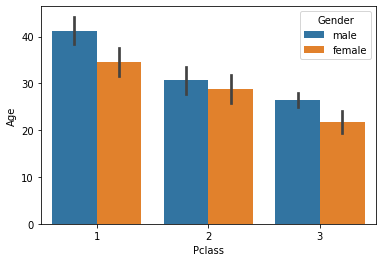

In [78]:
sns.barplot(df["Pclass"],df["Age"],hue=df["Gender"])

<AxesSubplot:xlabel='Age', ylabel='Survived'>

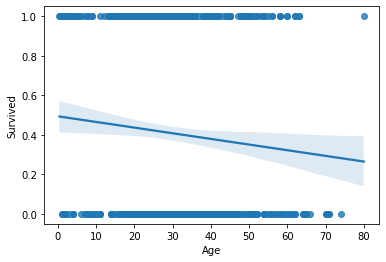

In [79]:
sns.regplot(x=df["Age"],y=df["Survived"])

<AxesSubplot:xlabel='Age', ylabel='Density'>

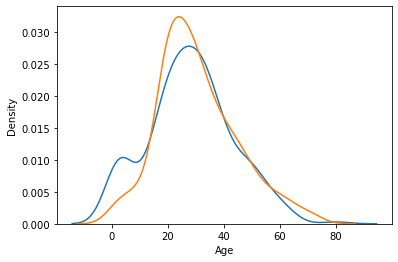

In [80]:
sns.distplot(df[df["Survived"]==1]["Age"],hist=False)
sns.distplot(df[df["Survived"]==0]["Age"],hist=False)

In [ ]:
### Split data into train and test set to avoid data leakage

In [88]:
x=df.drop(["Survived"],axis=1)
y=df["Survived"]

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=12)

# Feature Scaling

### 1.  Missing value imputation

In [81]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Gender           0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [83]:
df["Age"].fillna(df["Age"].median(),inplace=True)

In [84]:
df.drop(["Cabin"],axis=1,inplace=True)

In [86]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)